In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
import sympy as sym
import math

#import wget

In [111]:
position = np.zeros((4,2)) 
B=np.zeros(4)


In [112]:
position[0]


array([0., 0.])

In [113]:
P1,K1=[1,1],1
P2,K2=[-1,1],2
P3,K3=[-1,-1],0.5
P4,K4=[1,-1],0.3
position[0]=P1
position[1]=P2
position[2]=P3
position[3]=P4

B[0]=K1
B[1]=K2
B[2]=K3
B[3]=K4

In [114]:
def newton (position,B):   # retorna los valores de a00 a10 a01 a11 
    x1,y1=position[0][0],position[0][1]
    x2,y2=position[1][0],position[1][1]
    x3,y3=position[2][0],position[2][1]
    x4,y4=position[3][0],position[3][1]
    
    #T(x,y)= a00 + a10 x + a01 y + a11 xy
    M=np.matrix([[1,x1,y1,x1*y1],[1,x2,y2,x2*y2],[1,x3,y3,x3*y3],[1,x4,y4,x4*y4]])
    B=np.matrix([[K1],[K2],[K3],[K4]])
    X = np.linalg.inv(M).dot(B)
    return X


In [115]:
pendiente=newton (position,B)

In [116]:
float(pendiente[0])

0.95

In [117]:
def function (pendiente):  #con los valores de las "a" retorna l afunción de interpolación
    p0= float(pendiente[0])
    p1= float(pendiente[1])
    p2= float(pendiente[2])
    p3= float(pendiente[3])
    f= lambda x,y : (p0) + (p1*x )+ (p2*y) +( p3 *x*y)
    return f

In [118]:
f= function(pendiente)  #es es la función de interpolación


# grafica

In [119]:
x_0= np.linspace(-1,1,1000)
y_0= np.linspace(-1,1,1000)
X,Y= np.meshgrid (x_0,y_0)


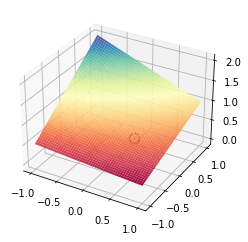

In [120]:
# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
plt.scatter(0,0.5,1.255, "k",linewidths=10) #el punto roto del espejo 
ax1.plot_surface(X,Y,f(X,Y),cmap="Spectral")



# Mostramos el gráfico
plt.show()

### respuesta del punto  f 

In [121]:
print("la temperatura según interpolación de newton es: ",f(0,0.5),"K")


la temperatura según interpolación de newton es:  1.225 K


### respuesta punto g 

In [122]:
def rotate ( position, alfa ):

    
    rotados=[0,0,0,0]


    
    rotados[0]=[(position[0][0]*np.cos(alfa))  - (position[0][1]*np.sin(alfa)) , (position[0][0]*np.sin(alfa))+ (position[0][1]*np.cos(alfa))]
    rotados[1]=[(position[1][0]*np.cos(alfa))  - (position[1][1]*np.sin(alfa)) , (position[1][0]*np.sin(alfa))+ (position[1][1]*np.cos(alfa))]
    rotados[2]=[(position[2][0]*np.cos(alfa))  - (position[2][1]*np.sin(alfa)) , (position[2][0]*np.sin(alfa))+ (position[2][1]*np.cos(alfa))]
    rotados[3]=[(position[3][0]*np.cos(alfa))  - (position[3][1]*np.sin(alfa)) , (position[3][0]*np.sin(alfa))+ (position[3][1]*np.cos(alfa))]
    
    
    
    
    
    return rotados

#que me tenga el vector y que me lo multiplique , por la matriz que no hace falta recalcula en fo r

In [123]:

rotate (position, 0)


[[1.0, 1.0], [-1.0, 1.0], [-1.0, -1.0], [1.0, -1.0]]

In [124]:
#punto h 
newton (position,B )

matrix([[ 0.95],
        [-0.3 ],
        [ 0.55],
        [-0.2 ]])

In [125]:
#punto i 
theta = np.linspace(0,2*np.pi,200),


In [126]:
len(theta[0])

200

### punto I 

In [127]:
R1= rotate(position,12)
R1

[[1.380426876732927, 0.3072810407320572],
 [-0.3072810407320572, 1.380426876732927],
 [-1.380426876732927, -0.3072810407320572],
 [0.3072810407320572, -1.380426876732927]]

In [128]:
newton (R1,B)

matrix([[ 0.95      ],
        [ 0.04195892],
        [ 0.62509155],
        [-0.47149905]])

In [129]:
#sacar el angulo donde menos temperatura recive 


# hacer la interplación en cada punto rotado , sacar la a, y con eso hacer la función de interpolación, despues con ese polinoio sacar cuanto vale el P1
rotados=[]
Aces=[]
funciones=[]
minimos={}



for angulo in theta[0]:
 
    rcien_rot= rotate (position, angulo) #son los puntos recien rotados
    rotados.append(rcien_rot) #me saco los rotados
    a=newton(rcien_rot,B) #me saca los A del recien rotado 
    g=function(a) #con los A me retorna la función de interpolación
    resultado=g(0,0.5)
    minimos[resultado]=angulo #que me guarde el resultado y angulo en el dic



In [130]:
min (minimos) #en un diccionario, el min es el nombre con el menor valor
minimos[min(minimos)]

2.652198823131082

In [131]:
print("la menor temperatura es alcanzada al rotar con un angulo de: "+str(minimos[min(minimos)])+ "° con una temperatura de:",min(minimos),"K")

la menor temperatura es alcanzada al rotar con un angulo de: 2.652198823131082° con una temperatura de: 0.636766412953249 K
